# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?units=Metric&lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lats[i]
        city_lng = lngs[i]
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = citipy.nearest_city(lats[i], lngs[i]).country_code
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | fort nelson
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | lashio
Processing Record 5 of Set 1 | te anau
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | buala
Processing Record 8 of Set 1 | beringovskiy
Processing Record 9 of Set 1 | boqueirao
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | batagay-alyta
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | tsihombe
Processing Record 17 of Set 1 | victor harbor
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | mabaruma
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 

Processing Record 47 of Set 4 | gorontalo
Processing Record 48 of Set 4 | barmer
Processing Record 49 of Set 4 | vredendal
Processing Record 0 of Set 5 | yakeshi
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | altamont
Processing Record 3 of Set 5 | faya
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | nizhneyansk
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | lasa
Processing Record 8 of Set 5 | obidos
Processing Record 9 of Set 5 | kasongo-lunda
Processing Record 10 of Set 5 | itapecerica
Processing Record 11 of Set 5 | mbala
Processing Record 12 of Set 5 | lebu
Processing Record 13 of Set 5 | sao joao da barra
Processing Record 14 of Set 5 | vao
Processing Record 15 of Set 5 | shrigonda
Processing Record 16 of Set 5 | zhangye
Processing Record 17 of Set 5 | sola
Processing Record 18 of Set 5 | hirado
Processing Record 19 of Set 5 | caravelas
Processing Record 20 of Set 5 | pangnirtung
Processing Record 21 of Set 5 

Processing Record 48 of Set 8 | niquelandia
Processing Record 49 of Set 8 | katangli
Processing Record 0 of Set 9 | kysyl-syr
Processing Record 1 of Set 9 | saint-augustin
Processing Record 2 of Set 9 | tyrma
Processing Record 3 of Set 9 | alyangula
Processing Record 4 of Set 9 | pangai
Processing Record 5 of Set 9 | yaring
Processing Record 6 of Set 9 | karratha
Processing Record 7 of Set 9 | ranfurly
Processing Record 8 of Set 9 | kuala terengganu
Processing Record 9 of Set 9 | wattegama
Processing Record 10 of Set 9 | makakilo city
Processing Record 11 of Set 9 | shangrao
Processing Record 12 of Set 9 | batemans bay
Processing Record 13 of Set 9 | labuan
Processing Record 14 of Set 9 | morehead
Processing Record 15 of Set 9 | aban
Processing Record 16 of Set 9 | broken hill
Processing Record 17 of Set 9 | kudahuvadhoo
Processing Record 18 of Set 9 | wuwei
Processing Record 19 of Set 9 | roma
Processing Record 20 of Set 9 | oktyabrskoye
Processing Record 21 of Set 9 | kasamwa
Process

Processing Record 42 of Set 12 | rio linda
Processing Record 43 of Set 12 | yeppoon
Processing Record 44 of Set 12 | kabare
Processing Record 45 of Set 12 | murliganj
Processing Record 46 of Set 12 | rungata
Processing Record 47 of Set 12 | kipushi
Processing Record 48 of Set 12 | port hedland
Processing Record 49 of Set 12 | la rioja
Processing Record 0 of Set 13 | kloulklubed
Processing Record 1 of Set 13 | onega
Processing Record 2 of Set 13 | krasnovishersk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [76]:
# Check the City url to validate
print(city_url)
print("https://api.openweathermap.org/data/2.5/weather?lat=40.957391&lon=110.301043$appid=a48b4ace02db8b31dfa2de740ac27598")

https://api.openweathermap.org/data/2.5/weather?units=Metric&lat=8.936184742614273&lon=-174.29800786685578&appid=a48b4ace02db8b31dfa2de740ac27598
https://api.openweathermap.org/data/2.5/weather?lat=40.957391&lon=110.301043$appid=a48b4ace02db8b31dfa2de740ac27598


In [77]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [78]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-87.889731,-76.086121,-41.20,91,15,6.81,ar,1680639487
1,fort nelson,63.180001,-120.341920,-7.17,81,7,4.32,ca,1680639488
2,albany,-75.822862,104.119801,-29.61,99,100,3.88,au,1680639488
3,lashio,22.103771,97.722752,15.85,39,10,0.95,mm,1680639489
4,te anau,-43.080785,166.643941,16.34,87,97,8.74,nz,1680639489


In [79]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-87.889731,-76.086121,-41.20,91,15,6.81,ar,1680639487
1,fort nelson,63.180001,-120.341920,-7.17,81,7,4.32,ca,1680639488
2,albany,-75.822862,104.119801,-29.61,99,100,3.88,au,1680639488
3,lashio,22.103771,97.722752,15.85,39,10,0.95,mm,1680639489
4,te anau,-43.080785,166.643941,16.34,87,97,8.74,nz,1680639489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

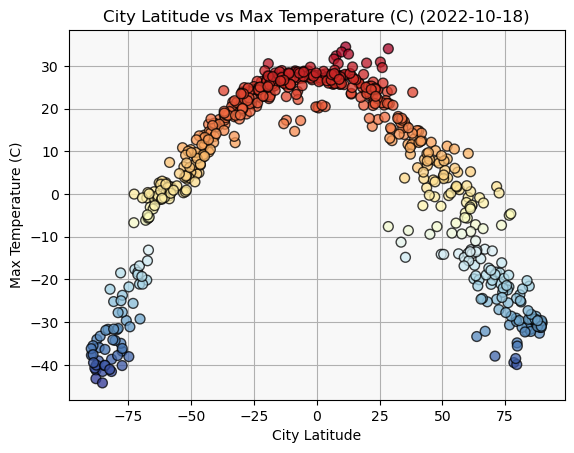

In [121]:
# Set x and y
x = city_data_df['Lat']
y = city_data_df['Max Temp']

# Define a color map
cmap = cm.get_cmap('RdYlBu_r')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (C) (2022-10-18)')


# Incorporate the other graph properties
# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Save the figure
plt.savefig("output_data/Fig1_Lat_vs_Max_Temp.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

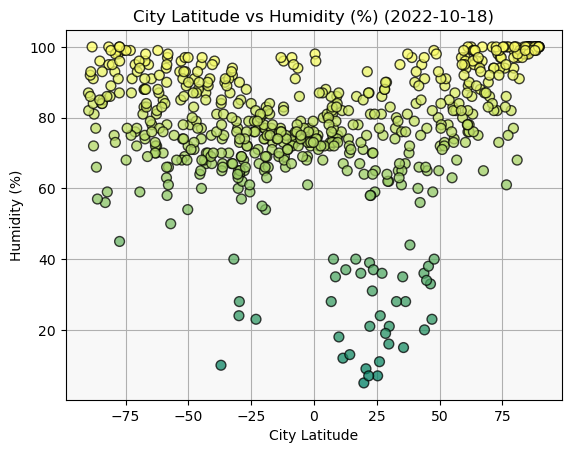

In [122]:
# Set x and y
x = city_data_df['Lat']
y = city_data_df['Humidity']

# Define a color map
cmap = cm.get_cmap('summer')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (%) (2022-10-18)')


# Incorporate the other graph properties
# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Save the figure
plt.savefig("output_data/Fig2_Lat_vs_Humidity.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

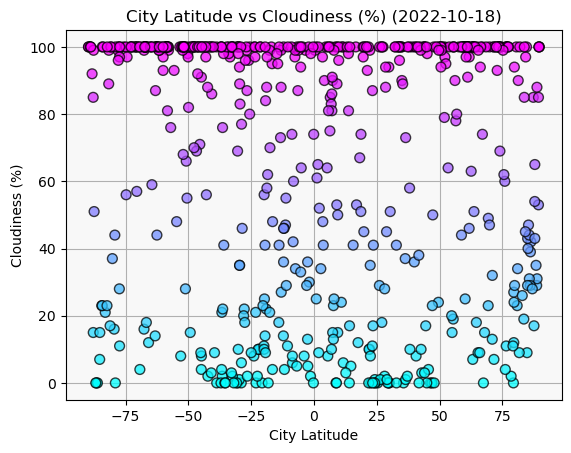

In [123]:
# Set x and y
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

# Define a color map
cmap = cm.get_cmap('cool')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%) (2022-10-18)')


# Incorporate the other graph properties
# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Save the figure
plt.savefig("output_data/Fig3_Lat_vs_Cloudiness.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

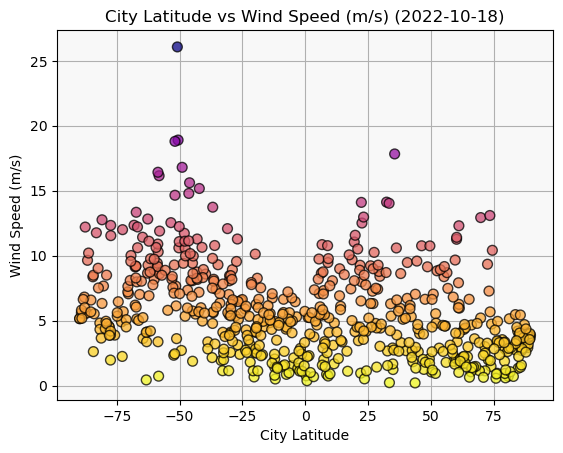

In [124]:
# Set x and y
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

# Define a color map
cmap = cm.get_cmap('plasma_r')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (m/s) (2022-10-18)')


# Incorporate the other graph properties
# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Save the figure
plt.savefig("output_data/Fig4_Lat_vs_Wind_Speed.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [85]:
# Linear Regressions are Calculated within each Segment

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fort nelson,63.180001,-120.341920,-7.17,81,7,4.32,ca,1680639488
3,lashio,22.103771,97.722752,15.85,39,10,0.95,mm,1680639489
8,boqueirao,50.245040,179.338822,3.96,72,100,1.04,ru,1680639491
11,port hardy,66.919275,129.664030,-12.91,96,100,1.31,ru,1680639492
12,faanui,51.959426,-128.743977,8.22,73,100,5.53,ca,1680639492


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-87.889731,-76.086121,-41.20,91,15,6.81,ar,1680639487
2,albany,-75.822862,104.119801,-29.61,99,100,3.88,au,1680639488
4,te anau,-43.080785,166.643941,16.34,87,97,8.74,nz,1680639489
5,kaitangata,-62.743109,173.190588,2.61,81,100,8.65,nz,1680639490
6,buala,-78.091453,-67.443251,-18.46,98,99,4.55,ar,1680639490


###  Temperature vs. Latitude Linear Regression Plot

The y equation is -0.75x + 36.60
The r-value is -0.9393152953620987
The p-value is 1.2341189232757277e-138


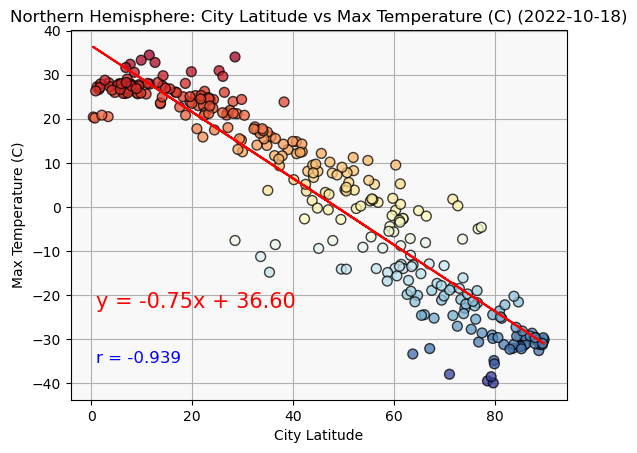

In [171]:
# Linear regression on Northern Hemisphere
# Set x and y
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Define a color map
cmap = cm.get_cmap('RdYlBu_r')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere: City Latitude vs Max Temperature (C) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.05, 0.25), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.05, 0.10),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig5_Northern_Trendline_Lat_vs_Max_Temp.png")

# Show the plot
plt.show()

The y equation is 0.77x + 40.19
The r-value is 0.928411922038037
The p-value is 3.528945677962016e-133


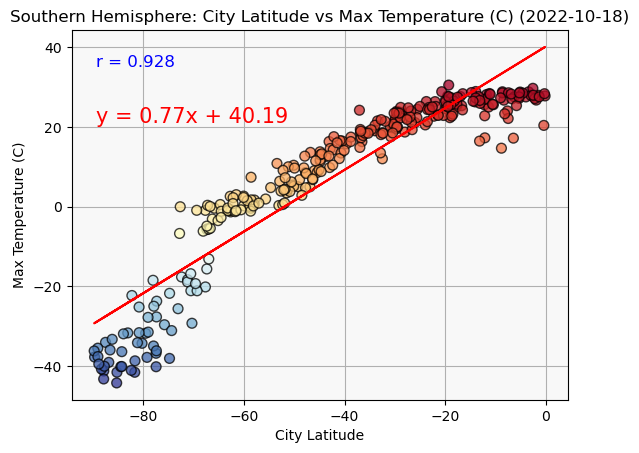

In [172]:
# Linear regression on Southern Hemisphere
# Set x and y
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Define a color map
cmap = cm.get_cmap('RdYlBu_r')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere: City Latitude vs Max Temperature (C) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.05, 0.75), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.05, 0.90),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig6_Southern_Trendline_Lat_vs_Max_Temp.png")

# Show the plot
plt.show()

### Discussion about the linear relationship (Latitude vs Temperature):

**Northern Hemisphere**
- According to the analysis, as latitude increases, temperature decreases significantly.
- With the r-value being -0.928, this indicates that latitude is a significant factor in determining temperature.
- The p-value of 1.23(e-138) is well below 0.05, giving an extremely high confidence that the correlation is not random.

**Southern Hemisphere**
- According to the analysis, as latitude decreases, temperature decreases significantly.
- With the r-value being 0.928, this suggests there's a extremely high correlation between latitude and temperature.
- The p-value of 3.521(e-133) gives an extremely high confidence that the correlation is not a result of chance.

**Summary**
- Cities near the equator experience significantly higher temperatures and there's an exceptionally strong correlation between temperature and latitude across the globe.

### Humidity vs. Latitude Linear Regression Plot

The y equation is 0.42x + 58.32
The r-value is 0.5054577827765125
The p-value is 1.3326417102905456e-20


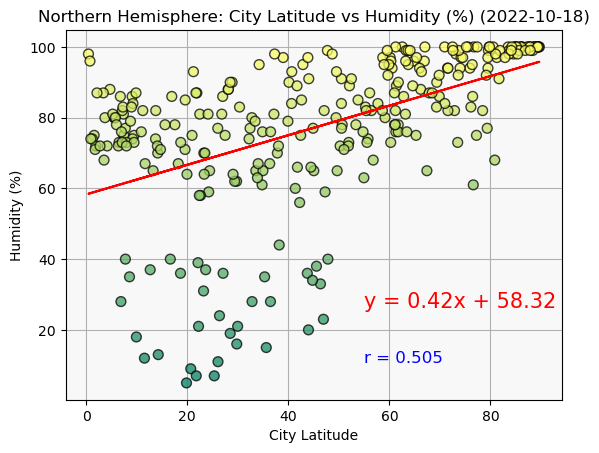

In [173]:
# Northern Hemisphere
# Set x and y
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Define a color map
cmap = cm.get_cmap('summer')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: City Latitude vs Humidity (%) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.60, 0.25), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.60, 0.10),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig7_Northern_Trendline_Lat_vs_Humidity")

# Show the plot
plt.show()

The y equation is -0.16x + 71.06
The r-value is -0.3082249024344082
The p-value is 3.521412350345566e-08


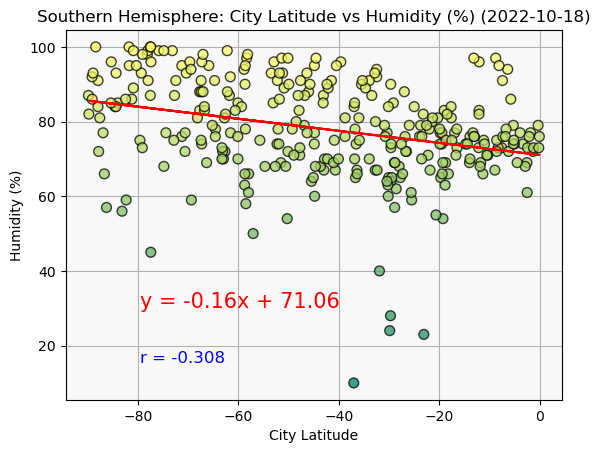

In [174]:
# Southern Hemisphere
# Set x and y
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Define a color map
cmap = cm.get_cmap('summer')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: City Latitude vs Humidity (%) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.15, 0.25), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.15, 0.10),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig8_Southern_Trendline_Lat_vs_Humidity.png")

# Show the plot
plt.show()

### Discussion about the linear relationship (Latitude vs Humidity):

**Northern Hemisphere**
- According to the analysis, as latitude increases, there's a notable increase in humidity.
- With the r-value being 0.5, this suggests there's a significant relationship between latitude and humidity.
- The p-value of 1.33(e-20) is much lower than 0.05, which strongly suggests the correlation is not due to chance.

**Southern Hemisphere**
- According to the analysis, as latitude decreases, humidity increases minimally.
- With the r-value being -0.308, this suggests there's a moderate correlation between latitude and humidity.
- The p-value of 3.521(e-08) strongly suggests the correlation is not a result of chance.

**Summary**
- There is a correlation between latitude and humidity. Cities closer to the equator saw lower levels of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The y equation is 0.08x + 58.85
The r-value is 0.05655677788213122
The p-value is 0.3321966237956947


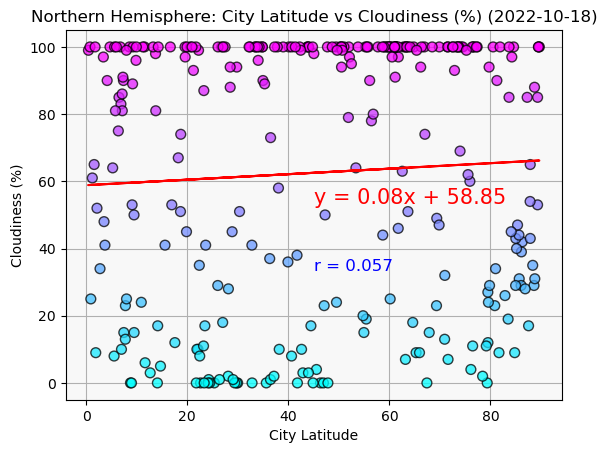

In [175]:
# Northern Hemisphere
# Set x and y
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Define a color map
cmap = cm.get_cmap('cool')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: City Latitude vs Cloudiness (%) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.5, 0.53), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.5, 0.35),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig9_Northern_Trendline_Lat_vs_Cloudiness.png")

# Show the plot
plt.show()

The y equation is -0.34x + 53.29
The r-value is -0.21509315803466983
The p-value is 0.00014592101891303477


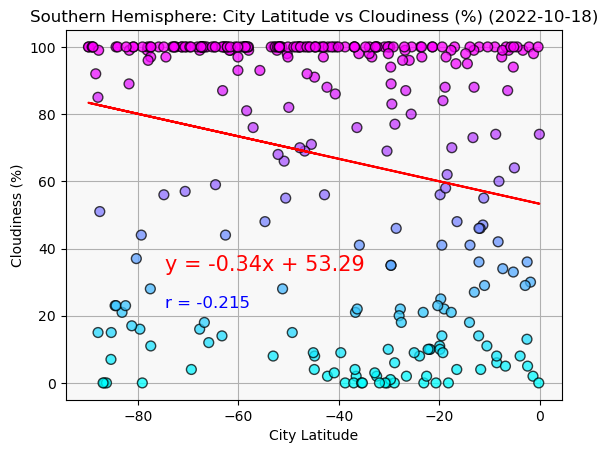

In [176]:
# Southern Hemisphere
# Set x and y
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# Define a color map
cmap = cm.get_cmap('cool')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: City Latitude vs Cloudiness (%) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.2, 0.35), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.20, 0.25),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig9_Southern_Trendline_Lat_vs_Cloudiness.png")

# Show the plot
plt.show()

### Discussion about the linear relationship (Latitude vs Cloudiness):

**Northern Hemisphere**
- According to the analysis, as latitude increases, wind speed tends to increase marginally.
- With the r-value being 0.057, this suggests there's a negligible relationship between latitude and cloudiness.
- The p-value of 0.332 is well above 0.05, which suggests the correlation may be due to random chance.

**Southern Hemisphere**
- According to the analysis, as latitude decreases, wind speed tends to increase minimally.
- With the r-value being -0.215, this suggests there's a weak correlation between latitude and cloudiness.
- The p-value of 0.000145 strongly suggests the correlation is not a result of chance.

**Summary**
- There may be a weak correlation between latitude and cloudiness, but further research and analysis is needed.

### Wind Speed vs. Latitude Linear Regression Plot

The y equation is -0.03x + 6.18
The r-value is -0.26457818195932553
The p-value is 3.926786097632808e-06


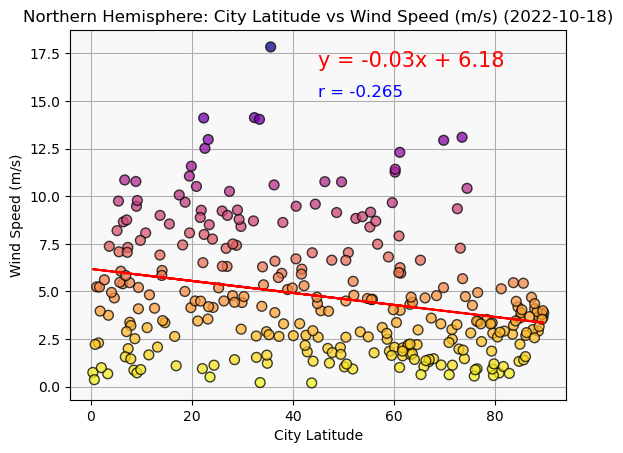

In [177]:
# Northern Hemisphere
# Set x and y
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Define a color map
cmap = cm.get_cmap('plasma_r')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Northern Hemisphere: City Latitude vs Wind Speed (m/s) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.5, 0.90), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.5, 0.82),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )

print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig10_Northern_Trendline_Lat_vs_Wind_Speed.png")

# Show the plot
plt.show()

The y equation is -0.05x + 4.20
The r-value is -0.36326691538636596
The p-value is 5.217290690386378e-11


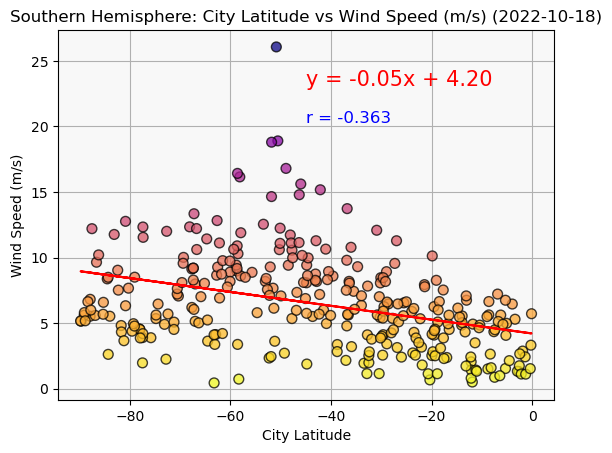

In [180]:
# Southern Hemisphere
# Set x and y
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Define a color map
cmap = cm.get_cmap('plasma_r')

# Normalize the values to map them to the color map
normalize = plt.Normalize(vmin=y.min(), vmax=y.max())

# Build scatter plot for latitude vs. temperature
plt.scatter(
            x,
            y,
            c=y,
            cmap=cmap,
            norm=normalize,
            s=50,
            zorder=3,
            edgecolor='black',
            linewidths=1,
            facecolor='#D0E9FF',
            alpha=0.75,
        )

# Add axis labels and a title to the plot
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere: City Latitude vs Wind Speed (m/s) (2022-10-18)')

# Grid
plt.grid()
# Background Color
plt.gca().set_facecolor('#F8F8F8')

# Calculate the linear regression coefficients
slope, intercept = np.polyfit(x, y, 1)

# Add the trendline to the plot
plt.plot(
    x,
    slope*x + intercept,
    color="red",
    zorder=4
)

# Add annotation for slope and intercept
yval = f"{slope:.2f}x + {intercept:.2f}"
plt.annotate(f"y = {yval}", 
             xy=(0.5, 0.85), 
             xycoords='axes fraction',
             fontsize=15, 
             color='red',
)

# Add annotation for R-value and print
# First, calculate the correlation coefficient (r-value) and p-value
r, p = pearsonr(x, y)
plt.annotate(f'r = {r:.3f}',
            (0.5, 0.75),
            xycoords='axes fraction',
            fontsize=12,
            color='blue',
            )
print(f"The y equation is {yval}")
print(f"The r-value is {r}")
print(f"The p-value is {p}")
# Save the figure
plt.savefig("output_data/Fig11_Southern_Trendline_Lat_vs_Wind_Speed.png")

# Show the plot
plt.show()

### Discussion about the linear relationship (Latitude vs Wind Speed):

**Northern Hemisphere**
- According to the analysis, as latitude increases, wind speed tends to decrease minimally.
- With the r-value being -0.26, this suggests there's a weak correlation between latitude and wind speed.
- The p-value of 3.92(e-6) strongly suggests the correlation is not a result of chance.

**Southern Hemisphere**
- According to the analysis, as latitude decreases, wind speed tends to increase minimally.
- With the r-value being -0.36, this suggests there's a weak correlation between latitude and wind speed.
- The p-value of 5.21(e-11) very strongly suggests the correlation is not a result of chance.

**Summary**
- The analysis suggests there may be a small correlation between latitude and wind speed, but further analysis is needed. 